# Reguarization

## L2正則化をスクラッチで実装

In [1]:
import torch
from torch import nn, optim
import torchvision

import torchvision
from torchvision import models, transforms
from torch.utils.data import DataLoader, Subset
import torch.nn.functional as F

import time


%load_ext autoreload
%autoreload 2
import utils
import time

In [2]:
# model
conv_model = nn.Sequential(
    # 1x28x28 
    nn.Conv2d(1,4, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),

    # 4x14x14
    nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),

    # 8x7x7
    nn.Conv2d(8,16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),

    # 16x4x4
    nn.Conv2d(16,32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 32x2x2
    # nn.Flatten() <- GAP -> 32x1x1
    nn.AdaptiveAvgPool2d(1),
    # 32xx1x1
    nn.Flatten(),
    # 32
    nn.Linear(32, 10) 
)

In [3]:
l2_reg = torch.tensor(0.)
for name, param in conv_model.named_parameters():
    # print(name, param)
    if name in 'weight':
        # L2正則化項
        l2_reg = torch.linalg.norm(param)**2

In [4]:
loss += (weight_decay / (2*m)) * l2_reg 

NameError: name 'loss' is not defined

## PytorchでL2正則を使う

In [ ]:
optim.SGD(conv_model.parameters(), lr=0.03, weight_decay=0.01)

In [6]:
# データの準備
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914,0.4822,0.4465], std=[0.2023,0.1994,0.2010]),
])

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'flog','horse', 'ship', 'truck')		

train_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=False, download=True, transform=transform)

# dataloader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)
# train_dataset_sub = Subset(train_dataset, range(1000))
# val_dataset_sub = Subset(val_dataset, range(1000))

# train_loader = DataLoader(train_dataset_sub, batch_size=128, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset_sub, batch_size=128, num_workers=4)


Files already downloaded and verified
Files already downloaded and verified


In [15]:
# model実装

def get_conv_model():
    return nn.Sequential(
    # 3x28x28
    nn.Conv2d(3, 4, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 4x14x14
    nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 8x7x7
    nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 16x4x4
    nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 32x2x2 -> GAP -> 32 x 1 x 1
    
    nn.Flatten(),
    # # 128 -> 32
    nn.Linear(128, 10)
    # nn.Linear(32, 10)
    # 10
)

In [16]:
conv_model = get_conv_model()
conv_model_l2 = get_conv_model()
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # CIFAR10用
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
train_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)

opt = optim.SGD(conv_model.parameters(), lr=0.03)
opt_l2 = optim.SGD(conv_model_l2.parameters(), lr=0.03, weight_decay=0.001)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# optimizerを設定
opt = optim.SGD(conv_model.parameters(), lr = 0.03)
opt_l2 = optim.SGD(conv_model.parameters(), lr = 0.03, weight_decay=0.001)


In [17]:
# num_epoch = 20
# train_losses, val_losses, val_accuracies = utils.learn(conv_model, train_loader, val_loader, opt, F.cross_entropy, num_epoch=num_epoch)
# train_losses_l2, val_losses_l2, val_accuracies_l2 = utils.learn(conv_model_l2, train_loader, val_loader, opt_l2, F.cross_entropy, num_epoch=num_epoch)

epoch: 0: train error: 2.2536296338376487, validation error: 2.078069437908221, validation accuracy: 0.2589992088607595


epoch: 1: train error: 1.9817669672124527, validation error: 1.9048669670201555, validation accuracy: 0.31180775316455694


epoch: 2: train error: 1.8484944586863603, validation error: 1.7432475180565556, validation accuracy: 0.37361550632911394


epoch: 3: train error: 1.7110785300774343, validation error: 1.6140859232673161, validation accuracy: 0.42049050632911394


epoch: 4: train error: 1.6189525362170871, validation error: 1.5892763152907166, validation accuracy: 0.4311708860759494


epoch: 5: train error: 1.5606027137288048, validation error: 1.5389797415914415, validation accuracy: 0.44343354430379744


epoch: 6: train error: 1.5154737877418927, validation error: 1.4732524594174157, validation accuracy: 0.4755735759493671


epoch: 7: train error: 1.4810904099813202, validation error: 1.4793821663796147, validation accuracy: 0.47379351265822783


epoch: 8: train error: 1.4502518616064126, validation error: 1.4253209904779363, validation accuracy: 0.4864517405063291


epoch: 9: train error: 1.4246810766132287, validation error: 1.4267650691768792, validation accuracy: 0.48595727848101267


epoch: 10: train error: 1.4007421198403438, validation error: 1.4556893713866608, validation accuracy: 0.4834849683544304


epoch: 11: train error: 1.381774458738849, validation error: 1.393226920803891, validation accuracy: 0.5024723101265823


epoch: 12: train error: 1.3612029775024375, validation error: 1.352237897583201, validation accuracy: 0.5134493670886076


epoch: 13: train error: 1.3493227333668858, validation error: 1.3562669482412217, validation accuracy: 0.5124604430379747


epoch: 14: train error: 1.3339436575579826, validation error: 1.3407098749015904, validation accuracy: 0.5144382911392406


epoch: 15: train error: 1.3184330804878488, validation error: 1.3231682913212837, validation accuracy: 0.5215585443037974


epoch: 16: train error: 1.3080514123677598, validation error: 1.3582308307478699, validation accuracy: 0.5096914556962026


epoch: 17: train error: 1.2915711829729397, validation error: 1.336576656450199, validation accuracy: 0.5166139240506329


epoch: 18: train error: 1.2856413394288944, validation error: 1.3394837138019031, validation accuracy: 0.5187895569620253


epoch: 19: train error: 1.2702101571175752, validation error: 1.2915775157228302, validation accuracy: 0.5363924050632911


epoch: 0: train error: 2.181844763743603, validation error: 2.033788457701478, validation accuracy: 0.27986550632911394


epoch: 1: train error: 1.9780196558179148, validation error: 1.9214899268331407, validation accuracy: 0.28530458860759494


epoch: 2: train error: 1.872556737621727, validation error: 1.8054777700689775, validation accuracy: 0.3416732594936709


epoch: 3: train error: 1.7085244899515606, validation error: 1.6190808573855628, validation accuracy: 0.416435917721519


epoch: 4: train error: 1.6043801835125975, validation error: 1.59483738337891, validation accuracy: 0.424248417721519


epoch: 5: train error: 1.5424438596076673, validation error: 1.5147289852552777, validation accuracy: 0.4530261075949367


epoch: 6: train error: 1.5013652686267862, validation error: 1.4734188333342346, validation accuracy: 0.47151898734177217


epoch: 7: train error: 1.4723482866726263, validation error: 1.4753910861437833, validation accuracy: 0.46825553797468356


epoch: 8: train error: 1.449843161856122, validation error: 1.4464855118642879, validation accuracy: 0.481309335443038


epoch: 9: train error: 1.4307571847725402, validation error: 1.4215510615819618, validation accuracy: 0.48872626582278483


epoch: 10: train error: 1.408124537114292, validation error: 1.4909485171112833, validation accuracy: 0.4759691455696203


epoch: 11: train error: 1.3937143047752283, validation error: 1.4132543077951745, validation accuracy: 0.4921875


epoch: 12: train error: 1.3744693756713282, validation error: 1.387349109106426, validation accuracy: 0.4991099683544304


epoch: 13: train error: 1.3620397605554526, validation error: 1.3611913542204266, validation accuracy: 0.509493670886076


epoch: 14: train error: 1.3494090009528352, validation error: 1.3590973359120042, validation accuracy: 0.5124604430379747


epoch: 15: train error: 1.3309070905456153, validation error: 1.3595271487779255, validation accuracy: 0.5103837025316456


epoch: 16: train error: 1.320479457640587, validation error: 1.3181850034979326, validation accuracy: 0.5257120253164557


epoch: 17: train error: 1.311035198933633, validation error: 1.3615991194036943, validation accuracy: 0.5091969936708861


epoch: 18: train error: 1.2968604095146785, validation error: 1.3124389331552047, validation accuracy: 0.5304588607594937


epoch: 19: train error: 1.2856355829312063, validation error: 1.285955864417402, validation accuracy: 0.5374802215189873


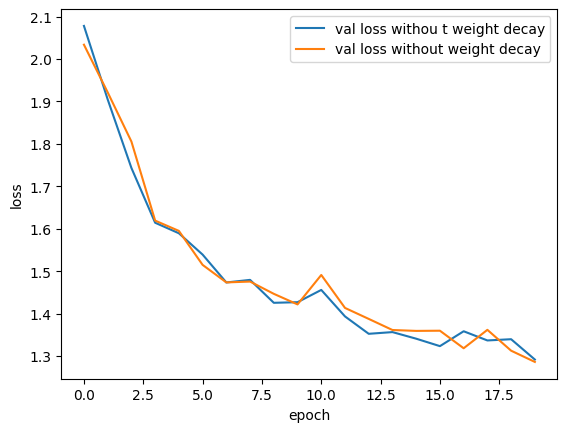

In [22]:
# 描画
import matplotlib.pyplot as plt
# plt.plot(train_losses, label='train loss without weigth decay')
# plt.plot(train_losses_l2, label='train loss with weight decay')
plt.plot(val_losses, label='val loss withou t weight decay')
plt.plot(val_losses_l2, label='val loss without weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

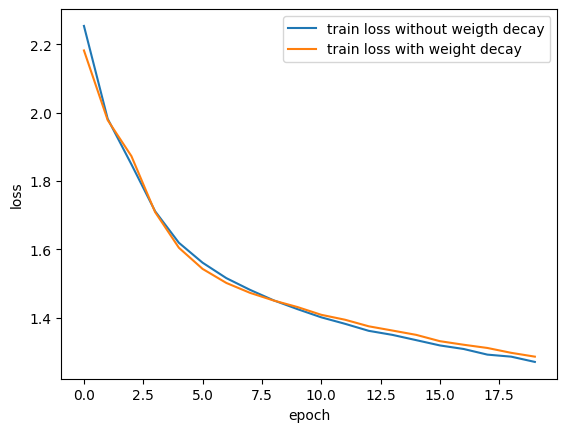

In [19]:
plt.plot(train_losses, label='train loss without weigth decay')
plt.plot(train_losses_l2, label='train loss with weight decay')
# plt.plot(val_losses, label='val loss withou t weight decay')
# plt.plot(val_losses_l2, label='val loss without weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Dropout

### スクラッチでDropoutを実装する

In [18]:
# dropoutの関数を実装する
def dropout(X, drop_p):
    # drop_p分でなくす. -> 1 - drop_p分残す
    keep_p = 1 - drop_p
    mask = torch.rand(X.shape) < keep_p
    return X * mask / keep_p

In [22]:
X = torch.randn(100, 100)
# 本来はReLU -> dropoutだが、省略する
droped_X =dropout(X, 0.3)
droped_X

tensor([[ 1.1410, -0.0000, -0.4729,  ..., -0.8791, -2.5388, -1.9363],
        [-0.8938,  0.0000, -0.0000,  ...,  0.0000, -1.9348,  0.4656],
        [-2.6353, -1.5070,  0.0000,  ...,  0.1731,  0.3867,  2.6484],
        ...,
        [-3.4791,  0.9292,  1.6697,  ...,  0.0000, -0.5510, -2.4964],
        [ 2.0496,  0.3838, -2.2762,  ...,  0.4343,  0.4701, -0.9204],
        [ 0.8369,  2.9693,  0.1071,  ...,  1.6421,  0.1972,  0.9035]])

In [12]:
# つまり、randnは0 ~ 1をランダムに取るから、その値が0.4より小さいならTrueとする -> 40%の確率で残る
torch.sum(torch.rand((10, 10)) < 1 - 0.6)

tensor(39)

In [15]:
X = torch.randn(100, 100)
keep_p = 0.3
mask = (torch.rand(X.shape) < keep_p)
(X*mask).sum() / keep_p

tensor(139.7141)

In [16]:
def relu(X):
    return torch.clamp(X, min=0)
    

### Dropoutを実装

In [23]:
model = nn.Sequential(
    nn.Linear(64, 20),
    nn.ReLU(),
    # 40%で0にする
    nn.Dropout(p=0.4),
    nn.Linear(20, 10)
)